# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [3]:
import pandas as pd
import seaborn as sb

### Read the csv data into a pandas dataframe and display the first 5 samples

In [5]:
Csv_File= r'C:\Users\isha6\Downloads\Real estate.csv'
RealEstate_DF = pd.read_csv(Csv_File)
RealEstate_DF



,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Show more information about the dataset

In [2]:
RealEstate_DF.info()

NameError: name 'RealEstate_DF' is not defined

### Find how many samples are there and how many columns are there in the dataset

In [14]:
Num_Sample, Num_Columns = RealEstate_DF.shape
print(f"Number of samples = {Num_Sample}")
print(f"Number of Columns = {Num_Columns}")


Number of samples = 414
Number of Columns = 8


### What are the features available in the dataset?

In [23]:
Features= RealEstate_DF.columns.tolist()
Features
print("Features in Dataset:")
Count=1
for feature in Features:
    print(f" {Count} {feature}")
    Count+=1

Features in Dataset:
 1 No
 2 X1 transaction date
 3 X2 house age
 4 X3 distance to the nearest MRT station
 5 X4 number of convenience stores
 6 X5 latitude
 7 X6 longitude
 8 Y house price of unit area


### Check if any features have missing data

In [33]:
Missing_Data = RealEstate_DF.isnull().sum()
Missing_Data

print("Features with missing data: ")
for feature, count in Missing_Data.items():
    if count > 0:
        print(f" - {feature}: {count} missing values")

Features with missing data: 


### Group all the features as dependent features in X

In [37]:
Target_Var = 'Y house price of unit area'
X= RealEstate_DF.drop(columns=[Target_Var])
X

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245
...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067


### Group feature(s) as independent features in y

In [41]:
Target_Var = ['No', 'X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']
X = RealEstate_DF[Target_Var]
Y= RealEstate_DF.drop(columns=X)
Y

,Y house price of unit area
0,37.9
1,42.2
2,47.3
3,54.8
4,43.1
...,...
409,15.4
410,50.0
411,40.6
412,52.5


### Split the dataset into train and test data

In [46]:
from sklearn.model_selection import train_test_split

Test_Size= 0.25

X_Train, X_Test, Y_Train, Y_Test = train_test_split(X,Y, test_size= Test_Size, random_state=42)
print("X_train shape:", X_Train.shape)
print("X_test shape:", X_Test.shape)
print("Y_train shape:", Y_Train.shape)
print("Y_test shape:", Y_Test.shape)

X_train shape: (310, 7)
X_test shape: (104, 7)
Y_train shape: (310, 1)
Y_test shape: (104, 1)


### Choose the model (Linear Regression)

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Model= LinearRegression()

68.07491951569283

### Create an Estimator object

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


Estimator = LinearRegression()


### Train the model

In [63]:
Estimator.fit(X_Train, Y_Train)

LinearRegression()

### Apply the model

In [64]:
Predictions = Estimator.predict(X_Test)
Predictions

array([[47.41935875],
       [40.69506039],
       [43.53735115],
       [39.36253317],
       [26.65125976],
       [46.70679622],
       [44.46400414],
       [47.10731742],
       [24.82323367],
       [55.87076875],
       [35.2527343 ],
       [37.44265624],
       [36.60437032],
       [24.68492635],
       [36.15858863],
       [33.79296889],
       [45.02925183],
       [45.46329194],
       [29.34556476],
       [45.30913342],
       [ 1.10456719],
       [36.73809951],
       [47.44205068],
       [46.58154848],
       [10.79403018],
       [38.80177703],
       [12.51721201],
       [43.86163858],
       [36.26377122],
       [37.81109783],
       [14.49706637],
       [40.90721709],
       [36.28808958],
       [28.61712794],
       [47.89558965],
       [31.13028294],
       [50.78762033],
       [12.81130203],
       [49.69981936],
       [39.71767695],
       [39.83217221],
       [40.36484364],
       [48.8361189 ],
       [37.02578054],
       [39.77614985],
       [47

### Display the coefficients

In [65]:
Coefficient= Estimator.coef_
Coefficient

array([[-6.32243008e-03,  5.85984113e+00, -2.64500961e-01,
        -5.05161951e-03,  1.11897077e+00,  2.16450067e+02,
        -4.34687808e+01]])

### Find how well the trained model did with testing data

In [67]:
mse = mean_squared_error(Y_Test, Predictions)
print("Mean Squared Error:", mse)

Mean Squared Error: 68.07491951569283


### Plot House Age Vs Price
#### Hint: Use regplot in sns

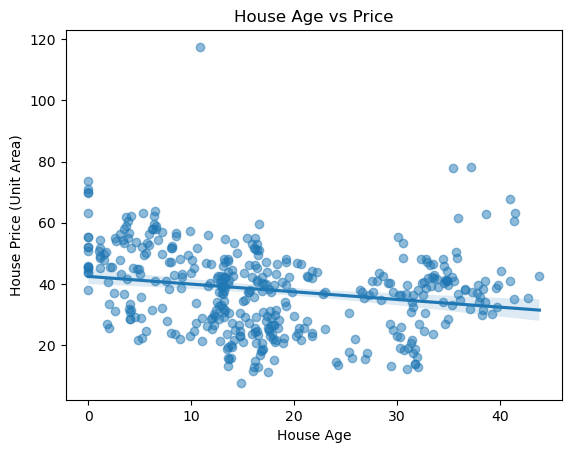

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.regplot(x='X2 house age', y='Y house price of unit area', data=RealEstate_DF, scatter_kws={'alpha':0.5})
plt.title('House Age vs Price')
plt.xlabel('House Age')
plt.ylabel('House Price (Unit Area)')
plt.show()

### Plot Distance to MRT station Vs Price

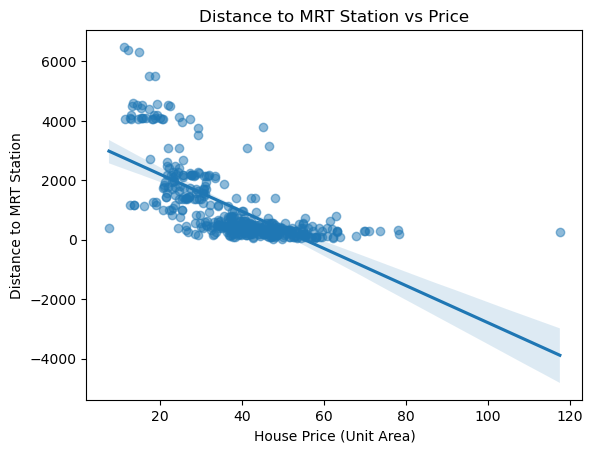

In [75]:
sns.regplot (x='Y house price of unit area', y='X3 distance to the nearest MRT station', data=RealEstate_DF,scatter_kws={'alpha': 0.5} )

plt.title('Distance to MRT Station vs Price')
plt.xlabel('House Price (Unit Area)')
plt.ylabel('Distance to MRT Station')
plt.show()

### Plot Number of Convienience Stores Vs Price

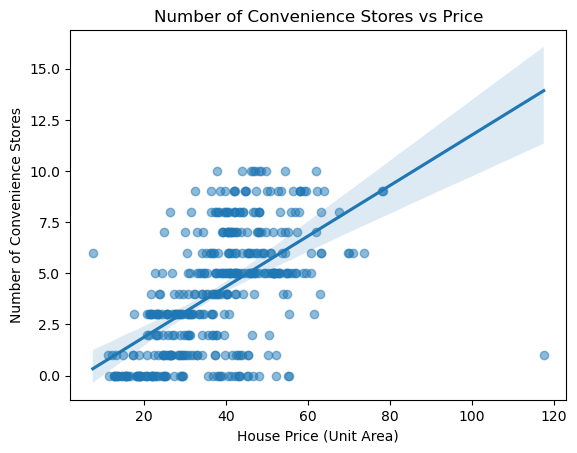

In [76]:
sns.regplot(x='Y house price of unit area', y='X4 number of convenience stores', data=RealEstate_DF, scatter_kws={'alpha': 0.5})
plt.title('Number of Convenience Stores vs Price')
plt.xlabel('House Price (Unit Area)')
plt.ylabel('Number of Convenience Stores')
plt.show()